In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb

# Convert to .csv and load data

In [2]:
import csv
from xml.dom import minidom

def xml_to_csv(xml_file, csv_file, record_tag):
    # Parse the XML file
    dom_tree = minidom.parse(xml_file)
    collection = dom_tree.documentElement

    # Get all record elements (e.g., <employee>)
    records = collection.getElementsByTagName(record_tag)

    # Extract headers from the first record
    headers = [node.tagName for node in records[0].childNodes if node.nodeType == node.ELEMENT_NODE]

    # Open CSV file for writing
    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(headers)

        # Write each record’s data
        for record in records:
            row = []
            for header in headers:
                element = record.getElementsByTagName(header)[0]
                value = element.firstChild.nodeValue if element.firstChild else ''
                row.append(value)
            writer.writerow(row)

    print(f"✅ XML data successfully written to '{csv_file}'")

# Example usage
if __name__ == "__main__":
    xml_to_csv("/Users/huynhphuongchi/Desktop/Unipi/DSS/Module 2/LDS Data 2025-2026/artists.xml", "artists.csv", "row")


✅ XML data successfully written to 'artists.csv'


In [3]:
import pandas as pd

raw_data = pd.read_csv('artists.csv', skipinitialspace=True)

In [4]:
df_cleaned = raw_data.copy()

# General information

In [5]:
raw_data

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,ART98118784,tormento,M,1975-09-06,Reggio Calabria,Italia,"rapper, cantautore e beatmaker italiano (1975-)",NaN,NaN,Reggio Calabria,Calabria,Italia,38.103539,15.639756
100,ART15560128,vacca,M,1979-10-21,Cagliari,Italia,rapper italiano,2001-01-01,NaN,Cagliari,Sardegna,Italia,39.217199,9.113311
101,ART57587384,willie peyote,M,1985-08-28,Torino,Italia,rapper e cantautore italiano (1985-),2004-01-01,NaN,Torino,Piemonte,Italia,45.067755,7.682489
102,ART71515715,yeиdry,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   active_end    0 non-null      float64
 9   province      70 non-null     object 
 10  region        68 non-null     object 
 11  country       70 non-null     object 
 12  latitude      72 non-null     float64
 13  longitude     72 non-null     float64
dtypes: float64(3), object(11)
memory usage: 11.5+ KB


In [7]:
raw_data.select_dtypes(include=['int64','bool','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
active_end,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,72.0,43.591374,2.248674,37.747452,41.577547,45.067755,45.464194,45.806691
longitude,72.0,11.060876,2.591871,7.525403,9.189635,9.917118,12.482932,18.225226


In [8]:
raw_data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
id_author,104,104,ART82291002,1
name,104,104,99 posse,1
gender,104,2,M,87
birth_date,73,73,1990-07-11,1
birth_place,72,40,Milano,15
nationality,71,2,Italia,70
description,86,69,gruppo musicale italiano,6
active_start,50,24,1996-01-01,6
province,70,26,Milano,19
region,68,13,Lombardia,24


In [9]:
raw_data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_author,104,104,ART82291002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,104,104,99 posse,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,104,2,M,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth_date,73,73,1990-07-11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth_place,72,40,Milano,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,71,2,Italia,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,86,69,gruppo musicale italiano,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_start,50,24,1996-01-01,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_end,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,70,26,Milano,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling missing value

In [10]:
def missing_values(data : pd.DataFrame, threshold : float = 10):

    na_count = data.isna().sum()
    na_exist = na_count[na_count > 0]
    na_abs_frq = na_exist.values
    na_rel_frq = round(na_exist/len(data)*100)
    missings = pd.DataFrame({'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)

    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
    
    return missings

missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
active_end,104,100.0,True
active_start,54,52.0,True
region,36,35.0,True
province,34,33.0,True
country,34,33.0,True
nationality,33,32.0,True
birth_place,32,31.0,True
latitude,32,31.0,True
longitude,32,31.0,True
birth_date,31,30.0,True


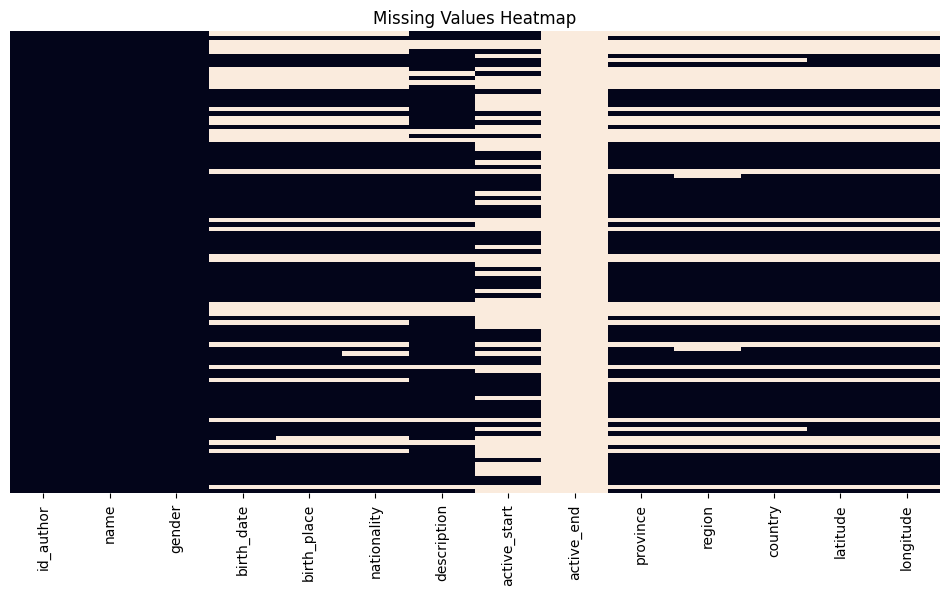

In [11]:
# Create a matplotlib figure with dimension (x, y)
plt.figure(figsize=(12, 6))
# Create a seaborn heatmap to visualy understand the dimension of missing values
sns.heatmap(df_cleaned.isnull(), cbar=False, yticklabels=False)
# Add a title to heatmap
plt.title("Missing Values Heatmap")
plt.show()

## Discussion

- Drop column "active-end" (100% mjssing) or fill from external data
- Use text in "description" to fill "nationality", then fill the rest with "mode" or use regression model (country+birth_place -> nationality) 
- latitude/longtitude to fill province/region/country
- Finally, drop row which has more than 50% missing columns

In [12]:
rows = df_cleaned.values.tolist()

## active_end

In [13]:
df_cleaned=df_cleaned.drop(['active_end'], axis=1)

In [14]:
missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
active_start,54,52.0,True
region,36,35.0,True
province,34,33.0,True
country,34,33.0,True
nationality,33,32.0,True
birth_place,32,31.0,True
latitude,32,31.0,True
longitude,32,31.0,True
birth_date,31,30.0,True
description,18,17.0,True


## nationality

In [15]:
keyword_map = {
    "italiano": "Italy",
    "italiana": "Italy",
    "italiani": "Italy",
    "canadese": "Canada",
    "francese": "France",
    "inglese": "United Kingdom",
    "americano": "United States",
    "americana": "United States",
    "indiano": "India"
}

def infer_nationality(description):
    if not description or not isinstance(description, str):
        return None
    desc = description.lower()
    for kw, nat in keyword_map.items():
        if kw in desc:
            return nat
    return None

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   province      70 non-null     object 
 9   region        68 non-null     object 
 10  country       70 non-null     object 
 11  latitude      72 non-null     float64
 12  longitude     72 non-null     float64
dtypes: float64(2), object(11)
memory usage: 10.7+ KB


In [17]:
for r in rows:

    # Lấy nationality và description
    nat = r[5]
    desc = r[6]

    if nat is None or isinstance(nat, float):
        nat_is_empty = True
    elif isinstance(nat, str):
        nat_is_empty = (nat.strip() == "")
    else:
        nat_is_empty = True  # fallback an toàn

    # Nếu nationality đã có → bỏ qua
    if not nat_is_empty:
        continue

    # Nếu description trống hoặc không phải string → bỏ qua
    if desc is None or not isinstance(desc, str) or desc.strip() == "":
        continue

    # Suy ra nationality
    inferred = infer_nationality(desc)

    # Nếu có kết quả thì gán vào nationality
    if inferred:
        r[5] = inferred

In [18]:
# Script kiểm tra & infer nationality từ description
import csv
import math
import unicodedata
import re

# ---------- CONFIG ----------
INPUT = "artists.csv"
OUTPUT = "artists_filled.csv"

# Từ điển keyword -> nationality (mở rộng được)
keyword_map = {
    "italiano": "Italy",
    "italiana": "Italy",
    "italiani": "Italy",
    "canadese": "Canada",
    "francese": "France",
    "inglese": "United Kingdom",
    "americano": "United States",
    "americana": "United States",
    "indiano": "India"
}

# ---------- Helpers ----------
def load_rows_if_needed(rows_variable_name="rows"):
    # Nếu biến rows đã tồn tại ở môi trường, bạn có thể bỏ qua phần load này.
    # Để an toàn, chúng ta sẽ load lại từ file nếu rows chưa định nghĩa.
    try:
        rows  # kiểm tra tên biến
        return rows  # nếu có, dùng luôn (thoả thuận: bạn đã có biến rows)
    except NameError:
        loaded = []
        with open(INPUT, encoding="utf-8") as f:
            reader = csv.reader(f)
            header = next(reader)
            for r in reader:
                loaded.append(r)
        globals()['rows'] = loaded
        globals()['header'] = header
        return loaded

def is_nan(x):
    return isinstance(x, float) and math.isnan(x)

def is_empty_value(x):
    # True nếu x là None, NaN, empty string, hoặc chỉ whitespace
    if x is None:
        return True
    if is_nan(x):
        return True
    if isinstance(x, str):
        return x.strip() == ""
    return False

def normalize_text(s):
    # Lowercase, strip, remove diacritics (accent), collapse spaces
    if s is None:
        return ""
    s = str(s).strip().lower()
    s = unicodedata.normalize('NFKD', s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r'\s+', ' ', s)
    return s

# For safer keyword matching: match whole word or substring depending on keyword
def description_matches(desc_norm, kw):
    # Ensure we match word boundaries where appropriate.
    # If kw contains spaces or hyphen, just search substring.
    if re.search(r'\b' + re.escape(kw) + r'\b', desc_norm):
        return True
    return (kw in desc_norm)

def infer_nationality_from_description(description):
    if is_empty_value(description):
        return None
    desc_norm = normalize_text(description)
    for kw, nat in keyword_map.items():
        kw_norm = normalize_text(kw)
        if description_matches(desc_norm, kw_norm):
            return nat
    return None

# ---------- Load data ----------
rows = load_rows_if_needed()
header = globals().get('header', None)
if header is None:
    # try to infer header from the first row length if missing (safe fallback)
    header = ['id_author','name','gender','birth_date','birth_place','nationality',
              'description','active_start','active_end','province','region','country','latitude','longitude']

# Column indices (an assume header names exist)
try:
    NAT_COL = header.index("nationality")
    DESC_COL = header.index("description")
except ValueError:
    # fallback to fixed indices if header not containing names
    NAT_COL = 5
    DESC_COL = 6

# ---------- Stats before ----------
total = len(rows)
missing_before = sum(1 for r in rows if is_empty_value(r[NAT_COL]))
print(f"Total rows = {total}")
print(f"Missing nationality BEFORE = {missing_before}")

# ---------- Run inference and capture changes ----------
changes = []   # list of (index, old_nat, new_nat, description)
no_match_samples = []  # keep some descriptions that had text but no match

for i, r in enumerate(rows):
    nat_val = r[NAT_COL]
    # treat pandas NaN (float) etc
    if not is_empty_value(nat_val):
        # already has nationality -> skip
        continue

    desc_val = r[DESC_COL]
    if is_empty_value(desc_val):
        # description empty -> nothing to do
        continue

    inferred = infer_nationality_from_description(desc_val)
    if inferred:
        old = r[NAT_COL]
        r[NAT_COL] = inferred
        changes.append((i, old, inferred, desc_val))
    else:
        # record for inspection (limit how many to store)
        if len(no_match_samples) < 50:
            no_match_samples.append((i, desc_val))

# ---------- Stats after ----------
missing_after = sum(1 for r in rows if is_empty_value(r[NAT_COL]))
filled_count = len(changes)
print(f"Filled nationality count = {filled_count}")
print(f"Missing nationality AFTER = {missing_after}")

# ---------- Show examples of changes ----------
if changes:
    print("\nExamples of filled rows (index, old, new, description):")
    for t in changes[:20]:
        print(t)

# ---------- Show some descriptions that had text but no match ----------
if no_match_samples:
    print("\nSample descriptions WITH text but NO keyword match (inspect to extend keyword_map):")
    for i, d in no_match_samples[:20]:
        print(f"[{i}] {d}")

# ---------- Save output file ----------
with open(OUTPUT, "w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows)

print(f"\nSaved output to: {OUTPUT}")


Total rows = 104
Missing nationality BEFORE = 23
Filled nationality count = 0
Missing nationality AFTER = 23

Sample descriptions WITH text but NO keyword match (inspect to extend keyword_map):
[8] cognome
[10] cognome
[12] cognome
[65] tipo di barca a vela usata nel XVIII e XIX secolo
[70] opera lirica di Pietro Mascagni

Saved output to: artists_filled.csv


In [19]:
missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
active_start,54,52.0,True
region,36,35.0,True
province,34,33.0,True
country,34,33.0,True
nationality,33,32.0,True
birth_place,32,31.0,True
latitude,32,31.0,True
longitude,32,31.0,True
birth_date,31,30.0,True
description,18,17.0,True


# Intergrate external data (Uber H3)

In [20]:
import h3

new_rows = []
for r in rows:
    lat = r[11]
    lon = r[13]

    if lat and lon:
        h3_cell = h3.latlng_to_cell(float(lat), float(lon), 8)  # resolution 8
    else:
        h3_cell = ""

    new_rows.append(r + [h3_cell])

H3LatLngDomainError: 